__FDS PROJECT : DIABETES PREDICTION__

__Problem Statement :__
 Predicting the likelihood of diabetes in individuals using health-related indicators, and identifying which factors contribute most to the diagnosis?

__1. IMPORTING LIBRARIES__

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind

__2. LOAD AND EXPLORE THE DATASET__

In [43]:
df = pd.read_csv('pima-data.csv')

print("🧾 First 5 records:")
print(df.head())

🧾 First 5 records:
   num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True  


In [44]:
print(df.tail())

     num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
763      0.171   63  1.8912     False  
764      0.340   27  1.0638     False  
765      0.245   30  0.9062     False  
766      0.349   47  0.0000      True  
767      0.315   23  1.2214     False  


__3. HANDLING MISSING VALUES__

In [45]:
# Quick summary of missing values
print(df.isnull().sum())

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64


In [46]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30s', '40s', '50s', '60+'])

In [47]:
print("\n📐 Shape of dataset:", df.shape)
print("\n📋 Column names:", df.columns.tolist())
print("\n🧮 Data types:\n", df.dtypes)


📐 Shape of dataset: (768, 11)

📋 Column names: ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin', 'diabetes', 'age_group']

🧮 Data types:
 num_preg           int64
glucose_conc       int64
diastolic_bp       int64
thickness          int64
insulin            int64
bmi              float64
diab_pred        float64
age                int64
skin             float64
diabetes            bool
age_group       category
dtype: object


In [48]:
print("\n❓ Missing values:\n", df.isnull().sum())


❓ Missing values:
 num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
age_group       0
dtype: int64


__4. CLEANING AND PREPROCESS__

In [52]:
#Convert diabetes to 0/1:
df['diabetes'] = df['diabetes'].astype(int)

In [55]:
#Replace invalid 0s with median:
invalid_zero_cols = ['glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi']
for col in invalid_zero_cols:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

__5. DATA VISUALISATIONS AND EDA__

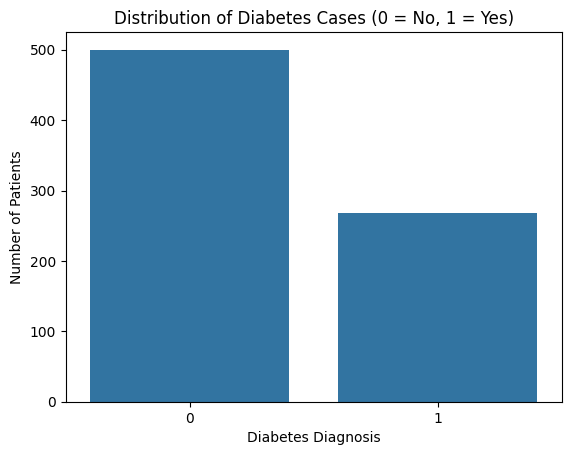

In [56]:
#Class Distribution
sns.countplot(data=df, x='diabetes')
plt.title("Distribution of Diabetes Cases (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Number of Patients")
plt.show()

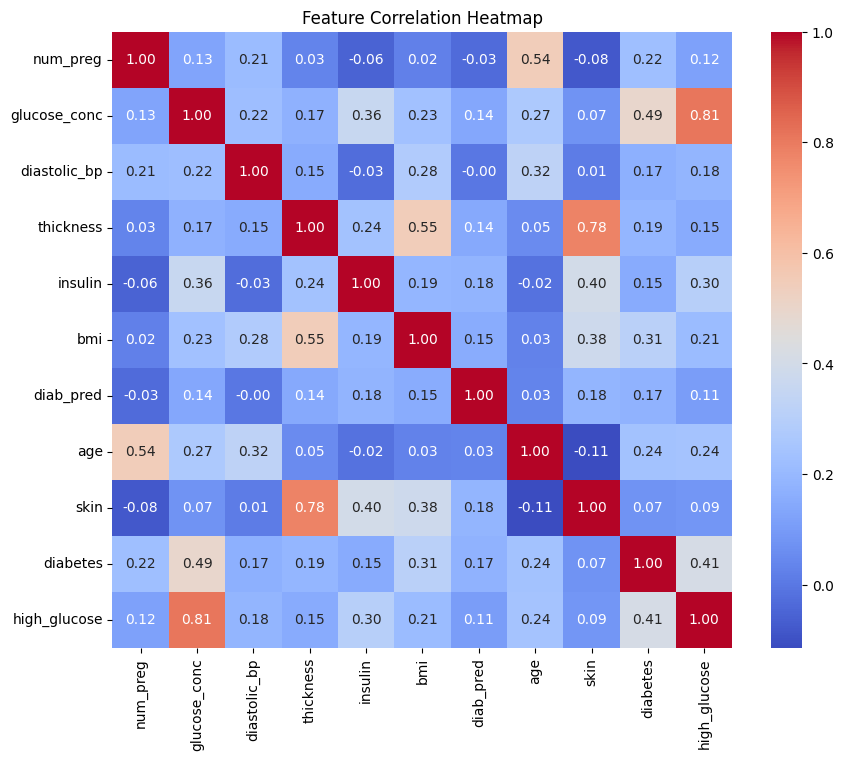

In [64]:
#Correlation Heatmaps
# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Box Plots
features = df.columns.drop('diabetes')
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='diabetes', y=col)
    plt.title(f"{col} vs. Diabetes")
    plt.show()

__6. Predictive Modeling – Logistic Regression__

In [58]:
#Train Test Split
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# Train and evaluate the model
#Define features and target
X = df.drop(columns=['diabetes', 'age_group', 'checkup_date'])  # drop non-numeric or derived columns
y = df['diabetes']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predict and evaluate
y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🎯 Accuracy: 0.7207792207792207

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154


📊 Confusion Matrix:
 [[82 18]
 [25 29]]


__7. STATISTICAL TEST EXAMPLE__

In [68]:
group_0 = df[df['diabetes'] == 0]['glucose_conc']
group_1 = df[df['diabetes'] == 1]['glucose_conc']

stat, p = ttest_ind(group_0, group_1)
print(f"t-statistic: {stat:.3f}, p-value: {p:.4f}")

t-statistic: -15.674, p-value: 0.0000


__8. DATA MANIPULATION__

In [69]:
glucose_25 = np.percentile(df['glucose_conc'], 25)
glucose_75 = np.percentile(df['glucose_conc'], 75)
print(f"Glucose IQR: {glucose_25}-{glucose_75}")

df['high_glucose'] = np.where(df['glucose_conc'] > glucose_75, 1, 0)

Glucose IQR: 99.75-140.25


In [71]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 100],
                         labels=['20s', '30s', '40s', '50s', '60+'])
print(df.groupby('age_group', observed=True)['diabetes'].mean())
print(df.groupby('age_group', observed=False)['diabetes'].mean())

age_group
20s    0.215827
30s    0.484076
40s    0.566372
50s    0.574074
60+    0.259259
Name: diabetes, dtype: float64
age_group
20s    0.215827
30s    0.484076
40s    0.566372
50s    0.574074
60+    0.259259
Name: diabetes, dtype: float64


__9. TIME SIMULATION + LINE PLOT__

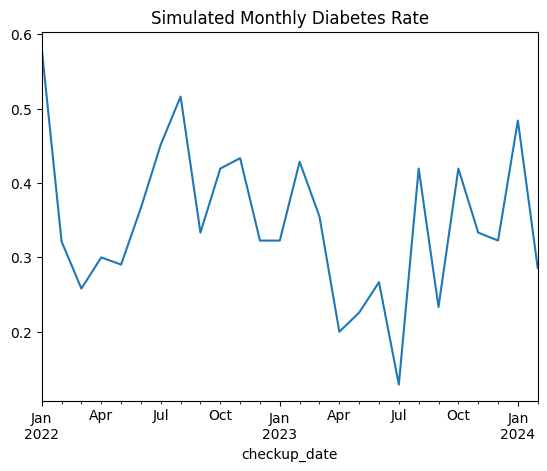

In [72]:
date_range = pd.date_range(start='2022-01-01', periods=len(df), freq='D')
df['checkup_date'] = date_range

diabetes_ts = df.groupby(df['checkup_date'].dt.to_period("M"))['diabetes'].mean()
diabetes_ts.plot(title="Simulated Monthly Diabetes Rate")
plt.show()

__10. PROBABILISTIC PREDICTION OUTPUT (SOLUTION)__

In [73]:
probs = model.predict_proba(X_test)
print(probs[:5])  # class 0 vs class 1 probabilities for 5 samples

[[0.3850491  0.6149509 ]
 [0.91034925 0.08965075]
 [0.70847737 0.29152263]
 [0.7374493  0.2625507 ]
 [0.97233773 0.02766227]]
